Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "Clai101"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [3]:
G = 6.67384 * 10** (-11)
force = lambda M1, M2, r: G*M1*M2/(r**2)
gauss_func = lambda x,a,b,c: a*np.exp((-1)*(x-b)**2/(2*c**2))
def error(M1, dM1, M2, dM2, r, dr):
    F = force(M1, M2, r)
    sigma = (sum(list(map(lambda _: _**2, [(-2)*G*M1*M2/(r**3)*dr, G*M1/(r**2)*dM2, G*M2/(r**2)*dM1]))))**0.5 
    return F, sigma

In [4]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639264)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

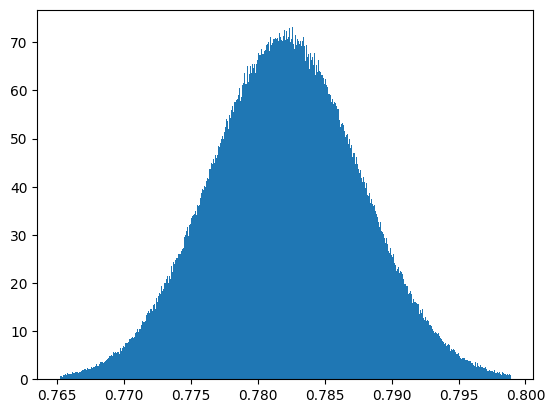

In [5]:
def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6, division = 500, hist = True, ret = False, f = None, s = None):
    
    M1_normal = np.random.normal(M1, dM1, n)
    M2_normal = np.random.normal(M2, dM2, n)
    r_normal = np.random.normal(r, dr, n)
    F_normal =  G * M1_normal * M2_normal / r_normal ** 2
    sigma = np.std(F_normal)
    F = np.median(F_normal)
    if s:
        count, bins = np.histogram(F_normal, division,range=[f-3*s, f+3*s], density=True)
    else:
        count, bins = np.histogram(F_normal, division,range=[F-3*sigma, F+3*sigma], density=True)
    plt.hist(bins[:-1], division, weights= count)
    if hist:
        plt.show()
    if ret:
        return F, sigma, count, bins

MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01, n=10**6)

# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

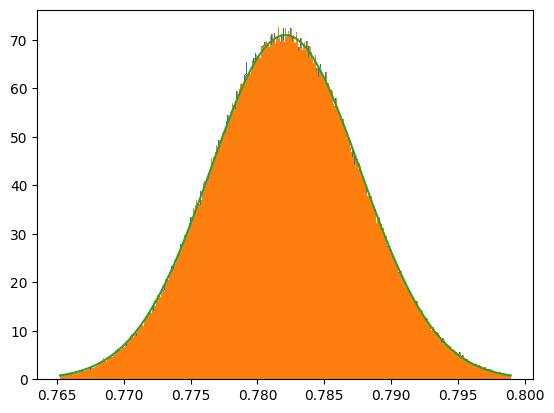

In [6]:
median, sigma, count, bins = MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01, n=10**6, hist = False, ret = True)
gauss = np.array([[i, gauss_func(i, 1/float(sigma*np.sqrt(2*np.pi)), median, sigma)] for i in np.arange(median-3*sigma, median+3*sigma, 6*sigma/1000)]).T
plt.hist(bins[:-1], bins, weights=count)
plt.plot(*gauss)
plt.show()

Сделайте вывод о согласованности двух подходов.

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

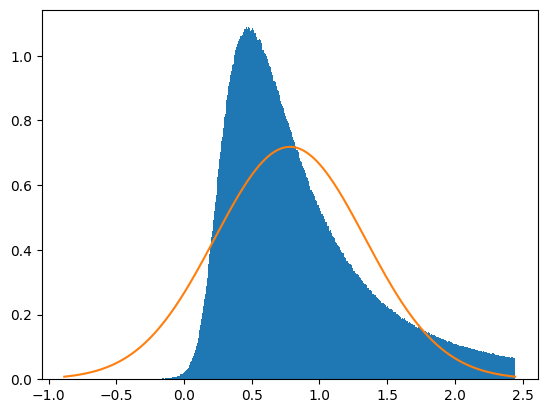

In [7]:


F, sigma = error(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
_, _, count, bins = MonteCarloNormal(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1,n = 10**7, ret = True, hist=False, f = F, s = sigma)
x = np.linspace(F - sigma * 5, F + sigma * 5, 1000)
gauss = np.array([[i, gauss_func(i, 1/float(sigma*np.sqrt(2*np.pi)), median, sigma)] for i in np.arange(median-3*sigma, median+3*sigma, 6*sigma/1000)]).T
plt.plot(*gauss)
plt.show()


# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

В случае сбольшими разбросами метод Монте-Карло работает лучше. Метод Моте-Карло способен смоделировать влияние погрешности измерение на результат и в отличе от математического расчета, он сохранит зависимость величины от её параметров. Но к большому сожалению метод Монте-Карло очень требователен техническим ресурсам.